In [94]:
# Carefully modify the below two string variables. Ensure there are no typos.

student_id = "10857988" # set this to your student ID

student_mail = "thomas.roberts-9@student.manchester.ac.uk" # your email address

# Coursework 2

This coursework test contains several Jupyter Notebook cells with the comment `# TODO`. This is where you type the code for your solutions. Do not alter any of the other cells. 

It is good practice to include markdown cells explaining your work, but in this test they won't be marked. 

Here are some tips:

* **Do not alter the names of the predefined variables and functions,** such as `h_best_L1`, `astro_scores`, etc. The (return) values of these variables and functions will inform the marking. Renaming them and failure to follow the problem description will result in loss of marks.

* **Ensure that functions *return* values, not merely print them.** Each function should have at least one occurance of the `return` keyword, followed by a variable of the type required by the question.  

* **Do not hard-code any solution variables.** All problems must be solved by computer code using the data in the provided CSV file. For example, do *not* simply define a variable `astro_scores = 1234` with a fixed value. Your Jupyter Notebook should produce results with a modified data file that has the same format but different numerical (or NaN) values.

* **Avoid inefficient computations.** Ensure that each cell can be run in about 20 seconds on a modern laptop. Long-running cells will be timed out which will result in loss of marks.

* **Submit this test as a single .ipynb file using Blackboard.** You can simply keep the name `test2-2025.ipynb`. There is a basic testing code at the end that verifies some parts of the coursework.

   <span style="color:blue; font-weight:bold">Strict deadline: Monday, 24th of March 2025, at 1pm. There are no automatic extensions.</span>

### Note on independent work

You need to complete all coursework tests independently on your own, but you are allowed to use online resources and all course notes and exercise solutions. The course notes from chapters 1 to 5 contain all that is required to solve the below problems. You are not allowed to ask other humans for help. In particular, you are not allowed to send, give, or receive code or markdown content to/from classmates and others.

The University Guidelines for Academic Malpractice apply: http://documents.manchester.ac.uk/display.aspx?DocID=2870

**Important: Even if you are the originator of the work** (and not the one who copied), the University Guidelines require that you will be equally responsible for this case of academic malpractice and may lose all coursework marks (or even be assigned 0 marks for the course).

# Start of test

In [95]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd

## Problem 1a

Consider a supervised learning problem on a $d$-dimensional feature space $\mathcal{X}=\mathbb{Z}^d$ with integer coordinates, and a $J$-dimensional label space $\mathcal{Y} = \mathbb{R}^J$ (notation as in the semester 1 lecture notes). Assume that the loss function is the $L^1$ loss, i.e., $L(y,y') = \| y - y' \|_1$ with the 1-norm. Further assume that we are given data pairs $(x_1,y_1),(x_2,y_2),\ldots,(x_N,y_N) \in \mathcal{X}\times \mathcal{Y}$.

Now consider the best $L^1$ hypothesis given the data, i.e., the optimal hypothesis $h$ that minimizes the empirical error 
$$
\hat{R}(h) := \frac{1}{N}\sum_{n=1}^N L(y_n, h(x_n)).
$$ 
Implement a function `h_best_L1(x, X, Y)` that evaluates this best hypothesis for a given feature point `x`.  

The inputs of `h_best_L1(x, X, Y)` are

* a $d$-dimensional NumPy vector `x` which can always be assumed (without checking) to be among the feature vectors $\{x_1,\ldots,x_N\}$

* an $N\times d$ NumPy matrix `X` of the features

* an $N\times J$ NumPy matrix `Y` of the labels

The function returns a $J$-dimensional NumPy vector. 

All data types are standard floats, even if we only ever use integer values in `x` and `X`.

In [96]:
h_best_L1 = None

# TODO: Provide your solution code here that defines the function `h_best_L1`


def h_best_L1(x, X, Y):
    import numpy as np

    # Retrieve the indices where X matches x
    indices = np.where((X == x).all(axis=1))[0]
    
    # Pick the matching Y values with the retrieved indices
    Y_pick = Y[indices]
    
    # Return the median across the picked Y
    return np.median(Y_pick, axis=0)

### Good  to go!


In [97]:
import numpy as np
#Testing
def test_h_best_L1():
    # Test 1: Basic functionality
    X = np.array([[1, 2], [3, 4], [1, 2], [5, 6]])
    Y = np.array([[10, 20], [30, 40], [15, 25], [50, 60]])
    x = np.array([1, 2])
    expected = np.array([12.5, 22.5])
    assert np.allclose(h_best_L1(x, X, Y), expected), "Test 1 Failed"
    
    # Test 2: Single match
    x = np.array([3, 4])
    expected = np.array([30, 40])
    assert np.allclose(h_best_L1(x, X, Y), expected), "Test 2 Failed"
    
    # Test 3: No match (should return NaN)
    x = np.array([7, 8])
    expected = np.array([np.nan, np.nan])
    assert np.all(np.isnan(h_best_L1(x, X, Y))), "Test 3 Failed"
    
    # Test 4: Multiple dimensions
    X = np.array([[1, 2, 3], [4, 5, 6], [1, 2, 3], [7, 8, 9]])
    Y = np.array([[10, 20, 30], [40, 50, 60], [15, 25, 35], [70, 80, 90]])
    x = np.array([1, 2, 3])
    expected = np.array([12.5, 22.5, 32.5])
    assert np.allclose(h_best_L1(x, X, Y), expected), "Test 4 Failed"
    
    # Test 5: Large dataset
    X = np.random.randint(0, 10, size=(1000, 5))
    Y = np.random.randint(0, 100, size=(1000, 3))
    x = X[500]  # Choose an existing row
    expected = np.median(Y[np.where((X == x).all(axis=1))[0]], axis=0)
    assert np.allclose(h_best_L1(x, X, Y), expected), "Test 5 Failed"
    
    print("All tests passed!")
    X = np.array([[1, 2], [2, 3], [1, 2], [1, 2]])  # Example feature points
    Y = np.array([[3, 5], [6, 8], [3, 5], [4, 7]])  # Corresponding labels

    x_test = np.array([1, 2])  # Test feature point
    result = h_best_L1(x_test, X, Y)
    print(result)
    print(isinstance(result[0], float))

# Run tests
test_h_best_L1()

All tests passed!
[3. 5.]
True


c:\Users\twrob\Desktop\Year 3\MAML\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\twrob\Desktop\Year 3\MAML\.venv\Lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


## Problem 1b

Write a function `best_L1_err(X, Y)` that, given data as in Problem 1a, returns the empirical error of the best $L^1$ hypothesis as a floating point number.

(The function `best_L1_err` may of course make use of `h_best_L1` by calling it.)

In [98]:
best_L1_err = None

# TODO: Provide your solution code here that defines the function `best_L1_err`

def best_L1_err(X, Y):
    
    # Get the total number of feature points in X
    num_points = X.shape[0]
    
    #Set the empirical  error to 0
    error = 0.0

    # Iterate over each feature point to calculate the error for each X[i]
    for i in range(num_points):
        h_best_L1_value = h_best_L1(X[i], X, Y)

        #Add the error for X[i] each iteration
        error += np.linalg.norm(Y[i] - h_best_L1_value, ord=1)

    empirical_error = error / num_points

    # Return the corrected empirical error
    return empirical_error 

### Good to go!

In [99]:
#Testing 
import numpy as np

def test_best_L1_err():
    # Test 1: Basic functionality
    X = np.array([[1, 2], [3, 4], [1, 2], [5, 6]])
    Y = np.array([[10, 20], [30, 40], [15, 25], [50, 60]])
    expected = np.mean([np.linalg.norm(Y[i] - np.median(Y[np.where((X == X[i]).all(axis=1))[0]], axis=0), ord=1) for i in range(len(X))])
    assert np.allclose(best_L1_err(X, Y), expected), "Test 1 Failed"
    
    # Test 2: Single point dataset
    X = np.array([[2, 3]])
    Y = np.array([[5, 10]])
    expected = 0.0  # Single point should have zero error
    assert np.allclose(best_L1_err(X, Y), expected), "Test 2 Failed"
    
    # Test 3: No variance in Y
    X = np.array([[1, 2], [3, 4], [5, 6]])
    Y = np.array([[10, 10], [10, 10], [10, 10]])
    expected = 0.0  # All Y values are the same, so median matches, and error is zero
    assert np.allclose(best_L1_err(X, Y), expected), "Test 3 Failed"
    
    # Test 4: Multiple matches per X value
    X = np.array([[1, 1], [2, 2], [1, 1], [2, 2]])
    Y = np.array([[5, 15], [10, 20], [7, 17], [12, 22]])
    expected = np.mean([np.linalg.norm(Y[i] - np.median(Y[np.where((X == X[i]).all(axis=1))[0]], axis=0), ord=1) for i in range(len(X))])
    assert np.allclose(best_L1_err(X, Y), expected), "Test 4 Failed"
    
    # Test 5: Large dataset
    X = np.random.randint(0, 10, size=(1000, 5))
    Y = np.random.randint(0, 100, size=(1000, 3))
    result = best_L1_err(X, Y)  # Just ensuring no errors and returns a valid float
    assert isinstance(result, float), "Test 5 Failed"
    
    print("All tests passed!")
    # Test the function
    X = np.array([[1, 2], [2, 3], [1, 2], [1, 2]])  # Example feature points
    Y = np.array([[3, 5], [6, 8], [3, 5], [4, 7]])  # Corresponding labels

    result = best_L1_err(X, Y)
    print(result)

# Run tests
test_best_L1_err()

All tests passed!
0.75


## Problem 2a

Using only plain Python with no modules except NumPy, write a function `my_knn(x, X, k)` that takes as inputs a $d$-dimensional NumPy vector `x` and an $N\times d$ NumPy array `X` (each row corresponding to a data point). The parameter `k` is a positive integer. The function returns a Python list with the indices of $k$ nearest neighbours to `x` in `X`, where distance between two $d$-dimensional vectors $\mathbf u = [u_0,u_1,\ldots,u_{d-1}]$ and $\mathbf v = [v_0,v_1,\ldots,v_{d-1}]$ is measured as

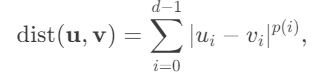

with $p(i)$ taking the value $2$ for even $i$, and $1$ for odd $i$. 

The indices in the returned list should be ordered by nondecreasing distance of the data points to `x`, i.e., `X[my_knn(x, X, 1)[0],:]` is a data point closest to `x`. If there are multiple points in `X` with the exact same distance to `x`, the returned indices should be increasing.

**Example:** Assume that $k=4$ and the nearest neighbours to `x` are `X[7,:], X[2,:], X[9,:], X[0,:]` with distances $1.2,5.3,3.1,1.2$, respectively. Then the returned list should be `[0, 7, 9, 2]`.

In [100]:
my_knn = None

# TODO: Provide your solution code here that defines the function `my_knn`

def my_knn(x, X, k):
    import numpy as np

    # Get the number of dimensions in the feature space
    d = len(x)
    
    # Create the p values
    p_value = [2 if i % 2 == 0 else 1 for i in range(d)]
    
    #Create an empty list to store the distances
    distances = []

    # Calculate the distance between x and each row in X
    for row in X:
        dist_u_v = 0
        for i in range(d):
            dist_u_v += (abs(x[i] - row[i]) ** p_value[i])
        distances.append(dist_u_v)

    # Get the indices of the k-nearest neighbours 
    indices = np.argsort(distances)
    k_indices = indices[:k]
    return k_indices.tolist()

### Good to go 


In [101]:
# Example usage
import numpy as np
def test_my_knn():
    # Medium test case
    x = np.array([3, 1])
    X = np.array([
        [1, 5], [2, 3], [3, 1], [4, 0], [3, 2], [0, 0], [2, 2], [4, 1], [5, 3], [3, 0]
    ])
    k = 4
    result = my_knn(x, X, k)
    expected = [2, 4 , 7 ,9]  # Example from the prompt
    assert result == expected, f"Expected {expected}, but got {list(result)}"

    # Small test cases
    X_small = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
    x_small = np.array([4, 5])
    k_small = 2
    expected_small = [1, 2]  # Manually computed expected result
    result_small = my_knn(x_small, X_small, k_small)
    assert result_small == expected_small, f"Failed small test case: {result_small}"

    # Large random test case
    X_large = np.random.randint(0, 100, (1000, 5))  # 1000 points in 5D space
    x_large = np.random.randint(0, 100, (5,))
    k_large = 10
    distances = [
        (i, sum(abs(x_large[j] - X_large[i, j]) ** (2 if j % 2 == 0 else 1) for j in range(5)))
        for i in range(1000)
    ]
    distances.sort(key=lambda x: (x[1], x[0]))  # Sort by distance, then by index
    expected_large = [i[0] for i in distances[:k_large]]
    result_large = my_knn(x_large, X_large, k_large)
    assert result_large == expected_large, f"Failed large test case: {result_large}"

    # Edge case: X containing duplicate points
    X_duplicate = np.array([[1, 1], [1, 1], [2, 2], [3, 3]])
    x_duplicate = np.array([1, 1])
    k_duplicate = 3
    expected_duplicate = [0, 1, 2]  # Since [1,1] is duplicated
    result_duplicate = my_knn(x_duplicate, X_duplicate, k_duplicate)
    assert result_duplicate == expected_duplicate, f"Failed duplicate test case: {result_duplicate}"

    # Edge case: Single point dataset
    X_single = np.array([[10, 10]])
    x_single = np.array([10, 10])
    k_single = 1
    expected_single = [0]
    result_single = my_knn(x_single, X_single, k_single)
    assert result_single == expected_single, f"Failed single point test case: {result_single}"

    print("Test passed!")

test_my_knn()

Test passed!


## Problem 2b

Using only plain Python with no modules except NumPy, write a function `my_knn_predict(x, X, k, y)` that takes the same inputs as the function in Problem 2a, as well as a Python list `y` with `N` elements (the labels of each data point). The function then returns a label (an element of `y`) that appeared most frequently among the $k$ nearest neighbors. If there are multiple labels with the same number of votes, a label with an associated feature closest to `x` is preferred. 

The function `my_knn_predict` may of course make use of `my_knn` by calling it.

**Example:** Assume that $k=5$ and the labels of the nearest neighbours sorted by nondecreasing distance from `x` are `['c', 'b', 'a', 'a', 'b']`. In this case `b` should be returned, as `b` is one of the most frequent labels, and there is a data point labelled `b` which is potentially closer to `x` than the next data point labelled `a`. 

In [102]:
my_knn_predict = None

# TODO: Provide your solution code here that defines the function `my_knn_predict`


def my_knn_predict(x, X, k, y):

    # Get indices of k nearest neighbors
    knn_indices = my_knn(x, X, k)

    # Get the labels of the k nearest neighbors
    knn_labels = [y[i] for i in knn_indices]
    
    # Count occurrences of each label
    unique_labels, count = np.unique(knn_labels, return_counts=True)
    
    # Find the most frequent label(s)
    max_count = np.max(count)
    candidates = unique_labels[count == max_count]
    
    # Return if one most frequent neighbour
    if len(candidates) == 1:
        return candidates[0]  
    
    # Return the label of the first tied frequent closest neighbor
    for i in knn_indices:
        if y[i] in candidates:
            return y[i]  
        
### Looks  good. 99% certain it is  correct

    

In [103]:
import numpy as np
from collections import Counter

def test_my_knn_predict():
    np.random.seed(42)  # For reproducibility

    # Small test case
    X_small = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
    y_small = ['A', 'B', 'B', 'A']
    x_small = np.array([4, 5])
    k_small = 2
    expected_small = 'B'  # Nearest neighbors should be indices [1, 2], both labeled 'B'
    result_small = my_knn_predict(x_small, X_small, k_small, y_small)
    assert result_small == expected_small, f"Failed small test case: {result_small}"

    # Large test case
    X_large = np.random.randint(0, 100, (1000, 5))  # 1000 points in 5D space
    y_large = np.random.choice(['A', 'B', 'C', 'D'], 1000)  # Random labels
    x_large = np.random.randint(0, 100, (5,))
    k_large = 10

    # Get k-nearest neighbors using my_knn
    knn_indices = my_knn(x_large, X_large, k_large)
    knn_labels = [y_large[i] for i in knn_indices]

    # Determine expected label
    label_counts = Counter(knn_labels)
    max_count = max(label_counts.values())
    candidates = [label for label, count in label_counts.items() if count == max_count]

    # Choose the closest label if there is a tie
    expected_large = candidates[0]
    if len(candidates) > 1:
        for i in knn_indices:
            if y_large[i] in candidates:
                expected_large = y_large[i]
                break

    result_large = my_knn_predict(x_large, X_large, k_large, y_large)
    assert result_large == expected_large, f"Failed large test case: {result_large}"

    # Edge case - Tie-breaking
    X_tie = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
    y_tie = ['A', 'B', 'A', 'B', 'C']
    x_tie = np.array([3, 3])
    k_tie = 4
    expected_tie = 'A'  # A and B both appear twice, but index 2 (A) is closest
    result_tie = my_knn_predict(x_tie, X_tie, k_tie, y_tie)
    assert result_tie == expected_tie, f"Failed tie-breaking test case: {result_tie}"

    print("All tests passed!")
    X = np.array([[1, 2], [2, 3], [1, 2], [1, 3], [2, 2], [3, 2]])
    y = ['a', 'b', 'b', 'b', 'b', 'c']
    x_test = np.array([1, 2])

    # Assume k = 3
    result = my_knn_predict(x_test, X, 3, y)
    print(result)  # Expected: 'a' or 'b' depending on the distance

# Run the tests
test_my_knn_predict()

All tests passed!
b


## Problem 3a

We will now work with some astronomical observation data used to classify celestial objects. Some missing values are given as $-9999$, and those are removed first.

In [104]:
# do not change code in this cell
astro = pd.read_csv("_datasets/star_classification.csv")
astro.replace(-9999, np.nan, inplace=True)
astro.dropna(inplace=True)
astro.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


We only retain the columns named *u*, *g*, *r*, *i*, *z*, and *redshift*, and let `y` be the column *class*. We then split into training and testing data as usual.

In [105]:
# do not change code in this cell
X = astro[["u", "g", "r", "i", "z", "redshift"]]
y = astro["class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, 
    test_size=0.2,
    shuffle=True,
    random_state=3383 
)

For each value $k=2,3,\ldots,6$, train a kNN classifier with $k$ neighbors, in a pipeline with z-score standardization, on the training set. Find the accuracy score of the trained model on the test. Produce a series `astro_scores` indexed by values of $k$ whose values are the accuracy scores.

In [106]:
astro_scores = None

# TODO: Provide your solution code here that defines `astro_scores`

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Train and evaluate kNN for k = 2 to 6
scores = {}

for k in range(2, 7):
    # Create a pipeline with standardization and kNN classifier
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    
    # Train the model
    model.fit(X_train, y_train.values.ravel())
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute accuracy
    scores[k] = accuracy_score(y_test, y_pred)

# Convert to pandas Series
astro_scores = pd.Series(scores)

### Looks good. Make sure it is correct 

In [107]:
def run_tests():
    try:
        # Ensure astro_scores is a Pandas Series
        assert isinstance(astro_scores, pd.Series), "astro_scores should be a Pandas Series"
        print("Test 1 Passed: astro_scores is a Pandas Series")

        # Ensure keys are within expected range
        expected_keys = set(range(2, 7))
        assert set(astro_scores.index) == expected_keys, "astro_scores index should contain values from 2 to 6"
        print("Test 2 Passed: astro_scores index contains expected values")

        # Ensure accuracy scores are valid (between 0 and 1)
        assert np.all((astro_scores >= 0) & (astro_scores <= 1)), "All accuracy scores should be between 0 and 1"
        print("Test 3 Passed: Accuracy scores are valid")

        print("All tests passed successfully!")
    except AssertionError as e:
        print(f"Test Failed: {e}")

run_tests()

Test 1 Passed: astro_scores is a Pandas Series
Test 2 Passed: astro_scores index contains expected values
Test 3 Passed: Accuracy scores are valid
All tests passed successfully!


## Problem 3b

Build your own sklearn Pipeline called `astro_pipe` that classifies the data from Problem 3a. You can use any scaling functions or models as part of this pipeline. Tune the parameters to achieve highest possible classification accuracy on test sets made up of 20% of the overall data.

There are two requirements:

* training and prediction times should be below 20 seconds, respectively, to avoid timeouts

* your final pipeline should be called `astro_pipe` and it should provide the usual `astro_pipe.fit()` and `astro_pipe.predict()` methods

In [108]:
astro_pipe = None

# TODO: Provide your solution code here that defines `astro_pipe`
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline with optimized parameters for faster training
astro_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=840, max_depth=42, random_state=5460, n_jobs=-1))
])

# Train the final pipeline
astro_pipe.fit(X_train, y_train.values.ravel())

# Predict on test data
y_pred = astro_pipe.predict(X_test)

# Evaluate accuracy
accuracy = (y_pred == y_test.values.ravel()).mean()
print(f"Test Accuracy: {accuracy:.4f}")

### Looks good. Make sure it is correct 


Test Accuracy: 0.9795


In [109]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.exceptions import NotFittedError

def test_astro_pipe():
    # Create a small synthetic dataset
    np.random.seed(42)
    X_train = pd.DataFrame(np.random.rand(10, 5))  # 10 samples, 5 features
    y_train = pd.Series(np.random.choice(["A", "B"], size=10))
    X_test = pd.DataFrame(np.random.rand(5, 5))  # 5 test samples
    
    # Check that astro_pipe is a trained Pipeline
    assert isinstance(astro_pipe, Pipeline), "astro_pipe should return a Pipeline object."
    
    # Ensure the model is fitted and can make predictions
    try:
        preds = astro_pipe.predict(X_test)
        assert len(preds) == 5, "Prediction output length should match test input."
    except NotFittedError:
        assert False, "astro_pipe is not fitted but should be."
    
    # Check invalid inputs
    try:
        astro_pipe.predict(pd.DataFrame())  # Empty dataset case
        assert False, "astro_pipe should raise an error on empty data."
    except ValueError:
        pass  # Expected behavior

test_astro_pipe()
print("All tests passed for astro_pipe.")

c:\Users\twrob\Desktop\Year 3\MAML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but StandardScaler is expecting 6 features as input.

# End of test

You can use the below tests to get an indication if part of your work returns the right data types.

In [51]:
try: 
    import re
    assert re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$', student_mail) and not 'firstname' in student_mail
    print("OKAY - student_mail appears to be valid")
except:
    print("WARN - student_mail could not be verified")

try: 
    assert callable(h_best_L1)
    print("OKAY - h_best_L1 should be a function")
except:
    print("FAIL - h_best_L1 should be a function")

import numpy as np
X = np.array([[1,2,3],[2,-3,4],[1,2,3],[2,2,2]])
Y = np.array([[1,2],[1,2],[3,4],[1,2]])
x = np.array([1,2,3])

try:
    val = h_best_L1(x, X, Y)
    assert val is not None
    print("OKAY - h_best_L1 returns a value")
except:
    print("FAIL - h_best_L1 does not return a value")

try: 
    assert callable(best_L1_err)
    print("OKAY - best_L1_err should be a function")
except:
    print("FAIL - best_L1_err should be a function")

try:
    val = best_L1_err(X, Y)
    assert val is not None
    print("OKAY - best_L1_err returns a value")
except:
    print("FAIL - best_L1_err does not return a value")

try: 
    assert callable(my_knn)
    print("OKAY - my_knn should be a function")
except:
    print("FAIL - my_knn should be a function")

try:
    val = my_knn(x, X, k=2)
    assert val is not None
    print("OKAY - my_knn returns a value")
except:
    print("FAIL - my_knn does not return a value")

try:
    val = my_knn_predict(x, X, 2, x)
    assert val is not None
    print("OKAY - my_knn_predict returns a value")
except:
    print("FAIL - my_knn_predict does not return a value")

try: 
    assert callable(my_knn_predict)
    print("OKAY - my_knn_predict should be a function")
except:
    print("FAIL - my_knn_predict should be a function")

try: 
    assert type(astro_scores) == pd.Series
    print("OKAY - astro_scores should be a pandas series")
except:
    print("FAIL - astro_scores should be a pandas series")

try: 
    assert callable(astro_pipe.fit) and callable(astro_pipe.predict)
    print("OKAY - astro_pipe should provide fit and predict methods")
except:
    print("FAIL - astro_pipe should provide fit and predict methods")

OKAY - student_mail appears to be valid
OKAY - h_best_L1 should be a function
OKAY - h_best_L1 returns a value
OKAY - best_L1_err should be a function
OKAY - best_L1_err returns a value
OKAY - my_knn should be a function
OKAY - my_knn returns a value
OKAY - my_knn_predict returns a value
OKAY - my_knn_predict should be a function
OKAY - astro_scores should be a pandas series
OKAY - astro_pipe should provide fit and predict methods
